In [3]:
import pandas as pd
import numpy as np
from numpy.linalg import svd
from scipy.linalg import svd, diagsvd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

df = pd.read_csv('ratings_small.csv')
df.head(50)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


Precisamos passar todos os dados para uma matriz

Exemplo 3 usuarios e 4 filmes

usuario1 = [nota_1_1, nota_1_2, nota_1_3, nota_1_4]

usuario2 = [nota_2_1, nota_2_2, nota_2_3, nota_2_4]

usuario3 = [nota_3_1, nota_3_2, nota_3_3, nota_3_4]


portanto nossa matiz A ficaria assim:

$$
A = \begin{bmatrix}
    nota_{1,1} & nota_{1,2} & nota_{1,3} & nota_{1,4} \\
    nota_{2,1} & nota_{2,2} & nota_{2,3} & nota_{2,4} \\
    nota_{3,1} & nota_{3,2} & nota_{3,3} & nota_{3,4}
\end{bmatrix}
$$



In [4]:
'''
Exemplo 3 usuarios e 4 filmes

usuario1 = [nota_1_1, nota_1_2, nota_1_3, nota_1_4]
usuario2 = [nota_2_1, nota_2_2, nota_2_3, nota_2_4]
usuario3 = [nota_3_1, nota_3_2, nota_3_3, nota_3_4]

matriz A = [ [nota_1_1, nota_1_2, nota_1_3, nota_1_4],
                         [nota_2_1, nota_2_2, nota_2_3, nota_2_4],
                         [nota_3_1, nota_3_2, nota_3_3, nota_3_4]]
'''

# Criando a matriz de notas
matriz_notas = df.pivot_table(index='userId', columns='movieId', values='rating')
matriz_notas = matriz_notas.fillna(0)
matriz_notas.head(2)

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def comprimir (u, s, vt, K):
    """Remove elementos de u, s e vt deixando somente K componentes restantes
    """ 
    u_ = u[:, :K]
    s_ = s[:K]
    vt_ = vt[:K, :]
    return u_, s_, vt_

In [71]:
# vamos escolher uma linha aleatória do nosso df

linha = np.random.randint(0, df.__len__())

# vamos pegar o id do usuário e do filme dessa linha

id_usuario = df.iloc[linha]['userId']
id_filme = df.iloc[linha]['movieId']

# vamos pegar a nota que esse usuário deu para esse filme

nota = df.iloc[linha]['rating']

A = deepcopy(matriz_notas)

# vamos trocar a nota do usuário por um valor aleatorio entre 0.0 e 5.0 e salvar no nosso A

A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)

nota_aleatoria = A.loc[id_usuario, id_filme]

In [72]:
# SVD da matriz A

u, s, vt = svd(A)

# vamos comprimir a matriz A para 2 componentes

u_, s_, vt_ = comprimir(u, s, vt, 300)

sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])

# vamos reconstruir a matriz A com 2 componentes

B = u_ @ sigma @ vt_

# vamos ver a nota que o usuário deu para o filme

print('Nota do usuário para o filme: ', nota)

print('Nota aleatória do usuário para o filme: ', nota_aleatoria)

# vamos ver a nota que o usuário deu para o filme na matriz B
B = pd.DataFrame(B, index=A.index, columns=A.columns)
print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])

Nota do usuário para o filme:  5.0
Nota aleatória do usuário para o filme:  1.2916987497232042
Nota do usuário para o filme na matriz B:  1.4407516020729498


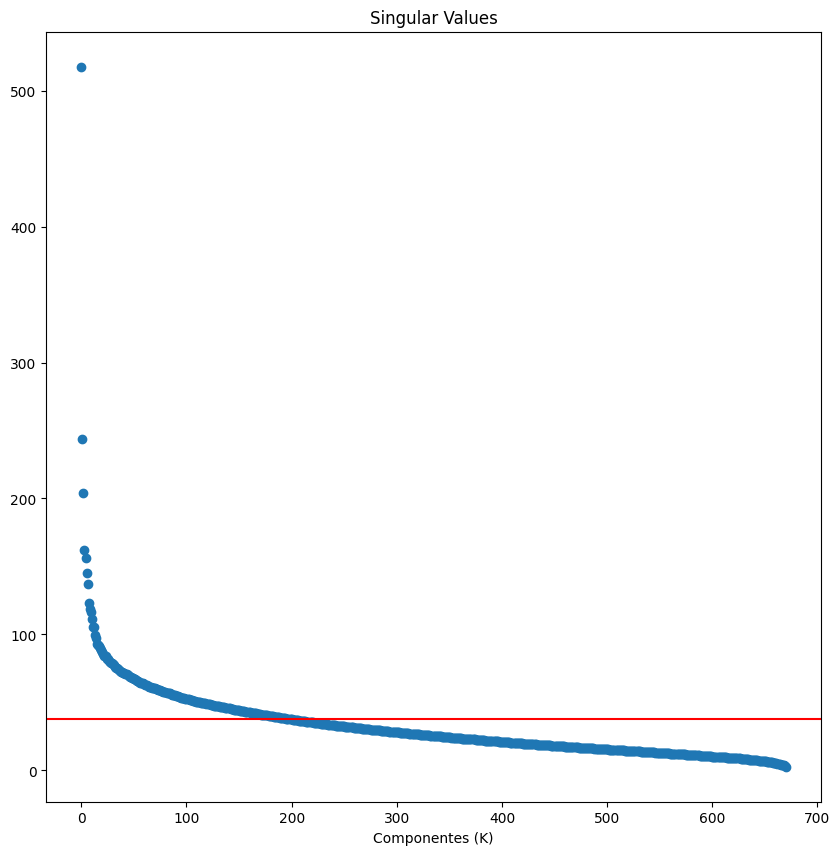

In [92]:
plt.figure(figsize=(10, 10))
plt.plot(s, 'o', linewidth=2)
# plota uma linha horizontal que passe na interseção do eixo x = 300
plt.axhline(y=s[200], color='r', linestyle='-')
plt.title('Singular Values')
plt.xlabel('Componentes (K)')
plt.show()

# eixo x = numero de componentes (K) e indice do vetor s
# eixo y = valor do vetor s

In [90]:
# Vamos fazer agora para varias linhas
for n in range(20):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 200)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('resultados.csv', mode='a', header=True)
    else:
        resultados.to_csv('resultados.csv', mode='a', header=False)

-------------------------------------
Iteração:  1
Nota do usuário para o filme:  0.5
Nota aleatória do usuário para o filme:  4.544265007933833
Nota do usuário para o filme na matriz B:  0.02822891110681507
-------------------------------------
Iteração:  2
Nota do usuário para o filme:  5.0
Nota aleatória do usuário para o filme:  1.6749024973523525
Nota do usuário para o filme na matriz B:  1.860200325362058
-------------------------------------
Iteração:  3
Nota do usuário para o filme:  2.0
Nota aleatória do usuário para o filme:  1.284286880318977
Nota do usuário para o filme na matriz B:  1.2847425025031816
-------------------------------------
Iteração:  4
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  4.672849005885475
Nota do usuário para o filme na matriz B:  4.633080675612048
-------------------------------------
Iteração:  5
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  4.868967776149223
Nota do usuário para o film

<Axes: xlabel='diferenca', ylabel='Density'>

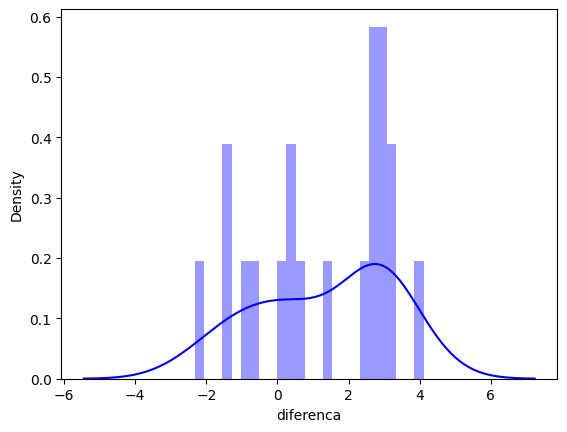

In [91]:
# vamos plotar histograma de diferença entre as notas da matriz B e a nota original
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

resultados = pd.read_csv('resultados.csv')

resultados['diferenca'] = resultados['nota'] - resultados['nota_reconstruida']

sns.distplot(resultados['diferenca'], bins=25, kde=True, color='blue', hist_kws={'alpha': 0.4})



In [93]:
for n in range(20):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 100)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('resultados.csv', mode='a', header=True)
    else:
        resultados.to_csv('resultados.csv', mode='a', header=False)

-------------------------------------
Iteração:  1
Nota do usuário para o filme:  3.0
Nota aleatória do usuário para o filme:  2.0976174862795287
Nota do usuário para o filme na matriz B:  2.026927532939009
-------------------------------------
Iteração:  2
Nota do usuário para o filme:  1.5
Nota aleatória do usuário para o filme:  4.426496290010606
Nota do usuário para o filme na matriz B:  2.976137844638807
-------------------------------------
Iteração:  3
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  0.627001996204391
Nota do usuário para o filme na matriz B:  2.6650154529136714
-------------------------------------
Iteração:  4
Nota do usuário para o filme:  3.0
Nota aleatória do usuário para o filme:  1.1693408032273807
Nota do usuário para o filme na matriz B:  1.4757010511238817
-------------------------------------
Iteração:  5
Nota do usuário para o filme:  5.0
Nota aleatória do usuário para o filme:  1.0655743991843014
Nota do usuário para o fil

<Axes: xlabel='diferenca', ylabel='Density'>

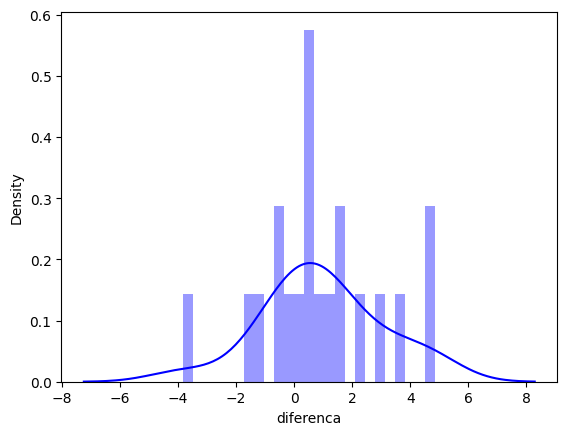

In [94]:
# vamos plotar histograma de diferença entre as notas da matriz B e a nota original
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

resultados = pd.read_csv('resultados.csv')

resultados['diferenca'] = resultados['nota'] - resultados['nota_reconstruida']

sns.distplot(resultados['diferenca'], bins=25, kde=True, color='blue', hist_kws={'alpha': 0.4})



In [95]:
for n in range(20):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 150)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('resultados.csv', mode='a', header=True)
    else:
        resultados.to_csv('resultados.csv', mode='a', header=False)

-------------------------------------
Iteração:  1
Nota do usuário para o filme:  2.0
Nota aleatória do usuário para o filme:  1.4116921907525515
Nota do usuário para o filme na matriz B:  0.7223739259443895
-------------------------------------
Iteração:  2
Nota do usuário para o filme:  4.5
Nota aleatória do usuário para o filme:  4.085568253575275
Nota do usuário para o filme na matriz B:  4.0116635583357185
-------------------------------------
Iteração:  3
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  2.3958261119490745
Nota do usuário para o filme na matriz B:  1.0305350009478096
-------------------------------------
Iteração:  4
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  0.026605844574580373
Nota do usuário para o filme na matriz B:  2.3685624780894905
-------------------------------------
Iteração:  5
Nota do usuário para o filme:  1.5
Nota aleatória do usuário para o filme:  2.0512851408332953
Nota do usuário para 

In [96]:
for n in range(20):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 50)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('resultados.csv', mode='a', header=True)
    else:
        resultados.to_csv('resultados.csv', mode='a', header=False)

-------------------------------------
Iteração:  1
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  2.9020409768353153
Nota do usuário para o filme na matriz B:  2.8821165752449427
-------------------------------------
Iteração:  2
Nota do usuário para o filme:  5.0
Nota aleatória do usuário para o filme:  0.4130334406513908
Nota do usuário para o filme na matriz B:  3.1626976043012367
-------------------------------------
Iteração:  3
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  2.9048108530619254
Nota do usuário para o filme na matriz B:  1.1743767268355787
-------------------------------------
Iteração:  4
Nota do usuário para o filme:  2.0
Nota aleatória do usuário para o filme:  2.472745866415919
Nota do usuário para o filme na matriz B:  0.03408675274573506
-------------------------------------
Iteração:  5
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  0.7802447622933267
Nota do usuário para o

In [97]:
for n in range(100):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 100)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('resultados.csv', mode='a', header=True)
    else:
        resultados.to_csv('resultados.csv', mode='a', header=False)

-------------------------------------
Iteração:  1
Nota do usuário para o filme:  1.0
Nota aleatória do usuário para o filme:  4.6795959178561555
Nota do usuário para o filme na matriz B:  0.38267352030490925
-------------------------------------
Iteração:  2
Nota do usuário para o filme:  3.5
Nota aleatória do usuário para o filme:  1.4983662405037372
Nota do usuário para o filme na matriz B:  1.3706819329987805
-------------------------------------
Iteração:  3
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  2.4867751314730775
Nota do usuário para o filme na matriz B:  2.729206180258829
-------------------------------------
Iteração:  4
Nota do usuário para o filme:  4.5
Nota aleatória do usuário para o filme:  3.5523398908704102
Nota do usuário para o filme na matriz B:  2.6311816245155533
-------------------------------------
Iteração:  5
Nota do usuário para o filme:  5.0
Nota aleatória do usuário para o filme:  0.4313361952898742
Nota do usuário para o

In [6]:
for n in range(250):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 100)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('resultados2.csv', mode='a', header=True)
    else:
        resultados.to_csv('resultados2.csv', mode='a', header=False)

-------------------------------------
Iteração:  1
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  2.066179266918373
Nota do usuário para o filme na matriz B:  1.7449853209612907
-------------------------------------
Iteração:  2
Nota do usuário para o filme:  4.0
Nota aleatória do usuário para o filme:  0.9079139250558399
Nota do usuário para o filme na matriz B:  0.7911942397976527
-------------------------------------
Iteração:  3
Nota do usuário para o filme:  5.0
Nota aleatória do usuário para o filme:  3.437580478635639
Nota do usuário para o filme na matriz B:  3.0140249793091534
-------------------------------------
Iteração:  4
Nota do usuário para o filme:  0.5
Nota aleatória do usuário para o filme:  0.18828631578018784
Nota do usuário para o filme na matriz B:  0.2234522428425761
-------------------------------------
Iteração:  5
Nota do usuário para o filme:  2.0
Nota aleatória do usuário para o filme:  2.2493692401255503
Nota do usuário para o 

In [ ]:
for n in range(500):
    linha = np.random.randint(0, df.__len__())
    id_usuario = df.iloc[linha]['userId']
    id_filme = df.iloc[linha]['movieId']
    nota = df.iloc[linha]['rating']
    A = deepcopy(matriz_notas)
    A.loc[id_usuario, id_filme] = np.random.uniform(0.0, 5.0)
    nota_aleatoria = A.loc[id_usuario, id_filme]
    u, s, vt = svd(A)
    u_, s_, vt_ = comprimir(u, s, vt, 100)
    sigma = diagsvd(s_, u_.shape[1], vt_.shape[0])
    B = u_ @ sigma @ vt_
    B = pd.DataFrame(B, index=A.index, columns=A.columns)
    print('-------------------------------------')
    print('Iteração: ', n+1)
    print('Nota do usuário para o filme: ', nota)
    print('Nota aleatória do usuário para o filme: ', nota_aleatoria)
    print('Nota do usuário para o filme na matriz B: ', B.loc[id_usuario, id_filme])
    # salva em um novo dataframe chamado resultados.csv
    resultados = pd.DataFrame({'nota': [nota], 'nota_aleatoria': [nota_aleatoria], 'nota_reconstruida': [B.loc[id_usuario, id_filme]]})
    if n == 0:
        resultados.to_csv('resultados500.csv', mode='a', header=True)
    else:
        resultados.to_csv('resultados500.csv', mode='a', header=False)